### Import Library

In [ ]:
# in anaconda prompt install
# pip install pydotplus
# pip install graphviz

In [1]:
import numpy as np # arrays
import pandas as pd # dataframes

from sklearn.model_selection import train_test_split # Train/Test Split

from sklearn.tree import DecisionTreeClassifier

from sklearn import metrics # evaluation

import matplotlib.pyplot as plt #visualisation

# show the decision tree
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline


from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

### Import Data

In [2]:
data_000 = pd.read_csv('Stations_VenueCounts_Clustered.csv', index_col = 0)
data_000.head()

,City,Latitude,Longitude,Arts & Entertainment,College & University,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Shop & Service,Travel & Transport,Cluster
Lyon,Ottawa,45.418518,-75.705015,1.0,2.0,14.0,2.0,4.0,47.0,12.0,16.0,0
Parliament,Ottawa,45.421389,-75.698889,2.0,0.0,19.0,3.0,4.0,46.0,23.0,3.0,0
Bloor-Yonge,Toronto,43.670812,-79.386847,1.0,3.0,13.0,1.0,3.0,49.0,26.0,4.0,0
King,Toronto,43.648523,-79.377773,2.0,1.0,16.0,4.0,4.0,45.0,20.0,8.0,0
Osgoode,Toronto,43.650802,-79.386541,7.0,1.0,19.0,5.0,9.0,36.0,9.0,15.0,0


### Assign

Define feature set X

In [3]:
X = data_000[['Arts & Entertainment'
                                   , 'College & University'
                                   , 'Food'
                                   , 'Nightlife Spot'
                                   , 'Outdoors & Recreation'
                                   , 'Professional & Other Places'
                                   , 'Shop & Service'
                                   , 'Travel & Transport'
                                  ]].values

Define labels for the feature set

In [4]:
Y = data_000['Cluster'].values

### Train / Test Split

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, 
    test_size = 0.2, 
    random_state=3)

print('Train set:', X_train.shape, Y_train.shape)
print('Test set:', X_test.shape, Y_test.shape)

Train set: (20, 8) (20,)
Test set: (6, 8) (6,)


### Decision Tree


Create an instance

In [14]:
dtree = DecisionTreeClassifier()

Fit the model

In [15]:
dtree.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Visualise the model

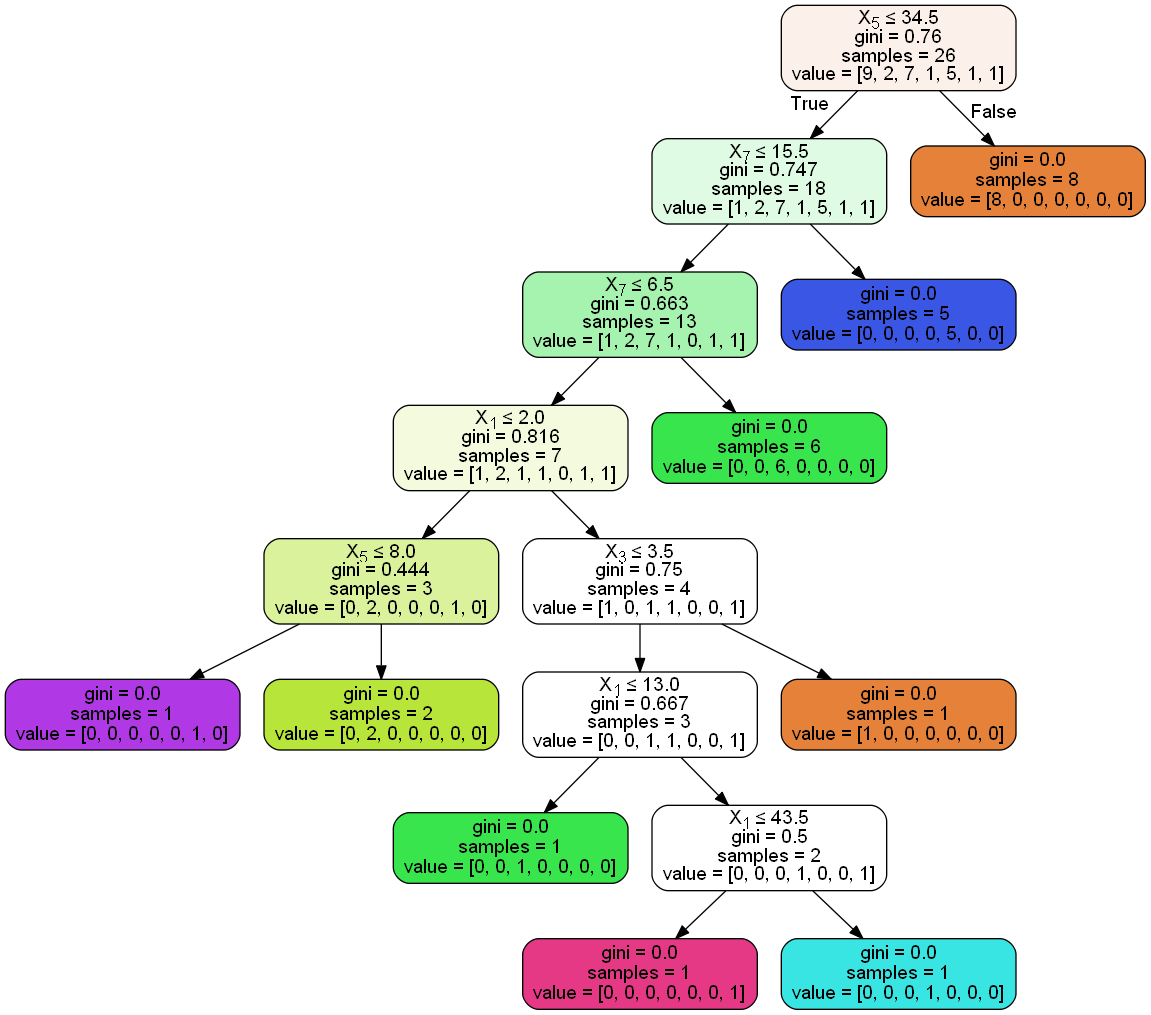

In [16]:
dot_data = StringIO()

export_graphviz(dtree, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

Image(graph.create_png())

#plt.tight_layout()

#plt.savefig('Macumber_Coursera_Capstone_Figure03.png') # has to be before plt.show()